<a href="https://colab.research.google.com/github/kdmwangi/CODSOFT/blob/main/Movie_rating_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Movie Rating Prediction**

Import Statements

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Read the Data

In [7]:
data = pd.read_csv('IMDb Movies India.csv', encoding='cp1006')

# Data Exploration

In [8]:
print(data.shape)
print(data.columns)

(15509, 10)
Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [9]:
data.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [10]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [11]:
data.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [13]:
data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


# Data Cleaning

In [14]:
# check for duplicate data and clean
data.duplicated().any()

True

In [15]:
data.drop_duplicates(inplace=True)

In [16]:
data.isna().any()

Name        False
Year         True
Duration     True
Genre        True
Rating       True
Votes        True
Director     True
Actor 1      True
Actor 2      True
Actor 3      True
dtype: bool

In [17]:
data.isna().sum()

Name           0
Year         527
Duration    8264
Genre       1876
Rating      7584
Votes       7583
Director     524
Actor 1     1615
Actor 2     2381
Actor 3     3140
dtype: int64

In [18]:
clean_data = data.dropna()

In [19]:
clean_data.shape

(5659, 10)

# Data Exploration

Analyze data and provide some trends.
<li>Year with best rating
<li>Does length of movie have any impact with the rating?
<li>Top 10 movies according to rating per year and overall.
<li>Number of popular movies released each year.
<li>Counting the number of votes which movies preformed better in <li>rating per year and overall.
<li>Any other trends or future prediction you may have
<li>Which director directed the most movies
<li>Which actor starred in the movie
<li>Any other trends you can find


In [20]:
# you can group the movies in terms of director, plot a chart to show the ratings
# group the movies by genre and check the ratings
# movie ratings as the year went by
# movie rating by the duration of the movie

In [21]:
# convert the year into a datetime object
def extract_year(yr):
  return str(yr).strip('()')
def extract_duration(dr):
  return int(dr.strip('min'))
def extract_votes(vt):
  return vt.replace(',','')
clean_data['Year'] = clean_data['Year'].apply(extract_year)
clean_data['Duration'] = clean_data['Duration'].apply(extract_duration)
clean_data['Votes'] = clean_data['Votes'].apply(extract_votes)


<ipython-input-21-a5bb05722fff>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Year'] = clean_data['Year'].apply(extract_year)
<ipython-input-21-a5bb05722fff>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Duration'] = clean_data['Duration'].apply(extract_duration)
<ipython-input-21-a5bb05722fff>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [22]:
clean_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [23]:
# clean_data['Year'] = pd.to_datetime(clean_data['Year'])
clean_data['Year'].astype('int')
clean_data['Genre'].astype('category')


1                            Drama
3                  Comedy, Romance
5           Comedy, Drama, Musical
6              Drama, Romance, War
8        Horror, Mystery, Thriller
                   ...            
15493                        Drama
15494    Biography, Drama, History
15503         Action, Crime, Drama
15505                Action, Drama
15508                Action, Drama
Name: Genre, Length: 5659, dtype: category
Categories (376, object): ['Action', 'Action, Adventure', 'Action, Adventure, Biography',
                           'Action, Adventure, Comedy', ..., 'Thriller, Musical, Mystery', 'Thriller, Mystery',
                           'Thriller, Mystery, Family', 'War']

In [24]:
clean_data.dtypes

Name         object
Year         object
Duration      int64
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [25]:
clean_data[clean_data['Rating'] == 0]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3


# Data Visualization

In [26]:
movie_by_genre = clean_data.groupby('Genre',as_index=False).count().sort_values(by='Name',ascending=False)


[Text(0.5, 1.0, 'Genre with highest movie total')]

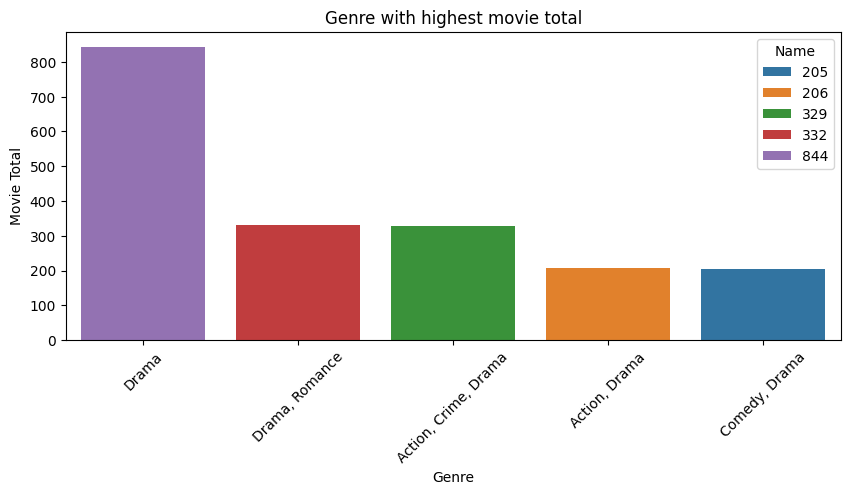

In [27]:
plt.figure(figsize=(10,4))
plt.xticks(rotation=45)
fig = sns.barplot(movie_by_genre[:5], x='Genre',y='Name' , hue='Name', dodge=False)
plt.ylabel('Movie Total')
fig.set(title='Genre with highest movie total')

[Text(0.5, 1.0, 'Genre with highest rating')]

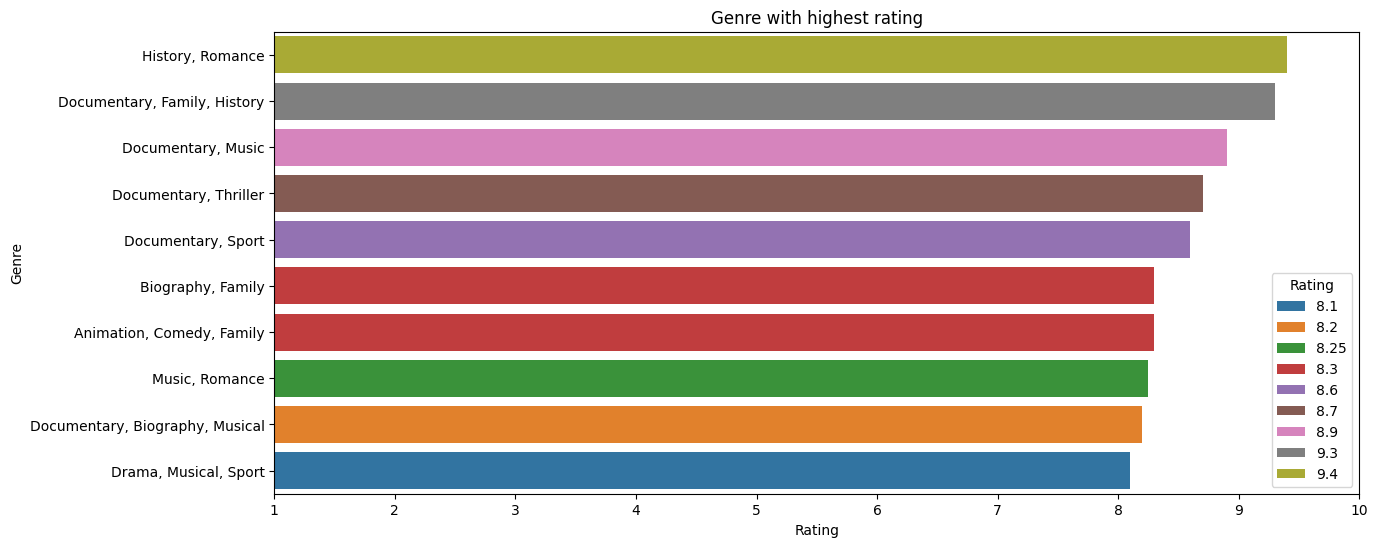

In [28]:
# top ten movie genre with highest rating average
plt.figure(figsize=(14,6))
plt.xlim(1,10)
rating_by_genre  = clean_data[['Genre','Rating']].groupby(by='Genre',as_index=False).mean().sort_values(by='Rating',ascending=False)
fig = sns.barplot(rating_by_genre[:10], x='Rating',y='Genre',hue='Rating',dodge=False, orient='h')
fig.set(title='Genre with highest rating')

In [29]:
# movie with the highest rating
print(clean_data['Rating'].max())

10.0


In [30]:
clean_data[clean_data['Rating'] == 10.0]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8339,Love Qubool Hai,2020,94,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari


In [31]:
# Top 10 movies according to rating per year and overall.
clean_data.sort_values(by='Rating', ascending=False)[:10]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8339,Love Qubool Hai,2020,94,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
5410,Half Songs,2021,79,"Music, Romance",9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
6852,June,2021,93,Drama,9.4,18,Suhrud Godbole,Vaibhav Khisti,Nilesh Divekar,Jitendra Joshi
14222,The Reluctant Crime,2020,113,Drama,9.4,16,Arvind Pratap,Dharmendra Ahir,Awanish Kotnal,Rakhi Mansha
5077,Gho Gho Rani,2019,105,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
1314,Ashok Vatika,2018,97,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi
13231,Sindhustan,2019,64,"Documentary, Family, History",9.3,36,Sapna Bhavnani,Leila Advani,Laj Badlani,Chaho Bhara
8344,Love Sorries,2021,101,"Comedy, Drama, Romance",9.3,79,Gautam Joshi,Prashant Chaubey,Puneet Chouksey,Amitabh Gupta
12673,Secrets of Sinauli,2021,56,"Documentary, History",9.3,1373,Raghav Jairath,Manoj Bajpayee,R.S. Bhist,K.N. Dixit
11843,Refl3ct,2021,65,Sci-Fi,9.3,467,Nikhil Mahar,Vijay Mahar,Vijay Mahar,Nikhil Mahar


In [32]:
# bottom 10 movies
clean_data.sort_values(by='Rating', ascending=False)[-10:]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
11463,Radhe,2021,135,"Action, Crime, Thriller",1.8,162455,Prabhu Deva,Salman Khan,Disha Patani,Randeep Hooda
5915,Humein Tumse Pyar Ho Gaya Chupke Chupke,2003,135,Drama,1.7,27,Pramod Mandloi,Meghna Desai,Siddharth Dhawan,Dinesh Hingoo
11005,Prem Aggan,1998,168,"Drama, Romance",1.7,544,Feroz Khan,Fardeen Khan,Meghna Kothari,Sameer Malhotra
2918,Chatur Singh Two Star,2011,150,"Action, Adventure, Comedy",1.7,624,Ajay Chandhok,Sanjay Dutt,Ameesha Patel,Anupam Kher
5711,Himmatwala,2013,150,"Action, Comedy, Drama",1.7,8186,Sajid Khan,Ajay Devgn,Tamannaah Bhatia,Mahesh Manjrekar
11644,Ram Gopal Varma Ki Aag,2007,171,"Action, Adventure, Comedy",1.7,6655,Ram Gopal Varma,Amitabh Bachchan,Mohanlal,Ajay Devgn
15040,Welcome to New York,2018,118,"Comedy, Drama",1.6,774,Chakri Toleti,Richard Harris,Jasmine Kaur,Sonakshi Sinha
9639,Mumbai Can Dance Saalaa,2015,135,Drama,1.6,43,Sachindra Sharma,Shakti Kapoor,Prashant Narayanan,Aditya Pancholi
3618,Desh Drohi,2008,140,"Action, Thriller",1.4,3899,Jagdish A. Sharma,Kamal Rashid Khan,Gracy Singh,Hrishitaa Bhatt
12171,Sadak 2,2020,133,"Action, Drama",1.1,67785,Mahesh Bhatt,Alia Bhatt,Priyanka Bose,Sanjay Dutt


In [33]:
# number of votes / movie with the highest votes/ votes per rating
clean_data['Votes'] = clean_data['Votes'].astype('int')

<ipython-input-33-10626301b0a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Votes'] = clean_data['Votes'].astype('int')


In [34]:
print(clean_data['Votes'].idxmax())
print(clean_data.loc[clean_data['Votes'].idxmax()])


8219
Name                       Life of Pi
Year                             2012
Duration                          127
Genre       Adventure, Drama, Fantasy
Rating                            7.9
Votes                          591417
Director                      Ang Lee
Actor 1                  Suraj Sharma
Actor 2                   Irrfan Khan
Actor 3                  Adil Hussain
Name: 8219, dtype: object


In [35]:
def add_decade(df):
  return (int(df)//10) * 10
rating_yr = clean_data[['Year','Rating']].groupby(by='Year',as_index = False).mean()
rating_yr['Decade'] = rating_yr['Year'].apply(add_decade)
rating_yr

,Year,Rating,Decade
0,1931,5.750000,1930
1,1932,6.000000,1930
2,1933,6.200000,1930
3,1934,5.600000,1930
4,1935,5.700000,1930
...,...,...,...
86,2017,6.012796,2010
87,2018,6.150495,2010
88,2019,6.265198,2010
89,2020,6.123571,2020


[Text(0.5, 1.0, 'Rating vs Years ')]

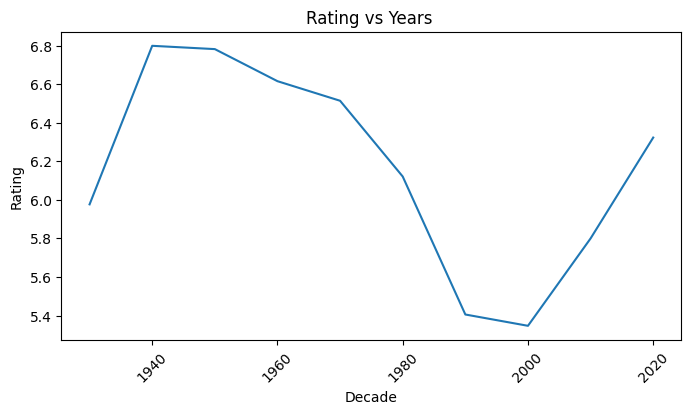

In [36]:
# rating per year and overall.
plt.figure(figsize=(8,4))
plt.xticks(rotation=45)
fig = sns.lineplot(rating_yr[['Decade','Rating']].groupby(by='Decade',as_index=False).mean(), x='Decade',y='Rating')
fig.set(title='Rating vs Years ')

In [37]:
# movies with the highest votes
clean_data.sort_values(by='Votes', ascending=False)[:10]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8219,Life of Pi,2012,127,"Adventure, Drama, Fantasy",7.9,591417,Ang Lee,Suraj Sharma,Irrfan Khan,Adil Hussain
75,3 Idiots,2009,170,"Comedy, Drama",8.4,357889,Rajkumar Hirani,Aamir Khan,Madhavan,Mona Singh
8233,Lion,2016,118,"Biography, Drama",8.0,220526,Garth Davis,Dev Patel,Nicole Kidman,Rooney Mara
4848,Gandhi,1982,191,"Biography, Drama, History",8.0,220118,Richard Attenborough,Ben Kingsley,John Gielgud,Rohini Hattangadi
14038,The Darjeeling Limited,2007,91,"Adventure, Comedy, Drama",7.2,185127,Wes Anderson,Owen Wilson,Adrien Brody,Jason Schwartzman
8228,Like Stars on Earth,2007,165,"Drama, Family",8.4,175810,Aamir Khan,Amole Gupte,Darsheel Safary,Aamir Khan
10882,PK,2014,153,"Comedy, Drama, Musical",8.1,168150,Rajkumar Hirani,Aamir Khan,Anushka Sharma,Sanjay Dutt
3410,Dangal,2016,161,"Action, Biography, Drama",8.4,165074,Nitesh Tiwari,Aamir Khan,Sakshi Tanwar,Fatima Sana Shaikh
11463,Radhe,2021,135,"Action, Crime, Thriller",1.8,162455,Prabhu Deva,Salman Khan,Disha Patani,Randeep Hooda
3829,Dil Bechara,2020,101,"Comedy, Drama, Romance",6.6,117377,Mukesh Chhabra,Sushant Singh Rajput,Sanjana Sanghi,Sahil Vaid


<Figure size 800x400 with 0 Axes>

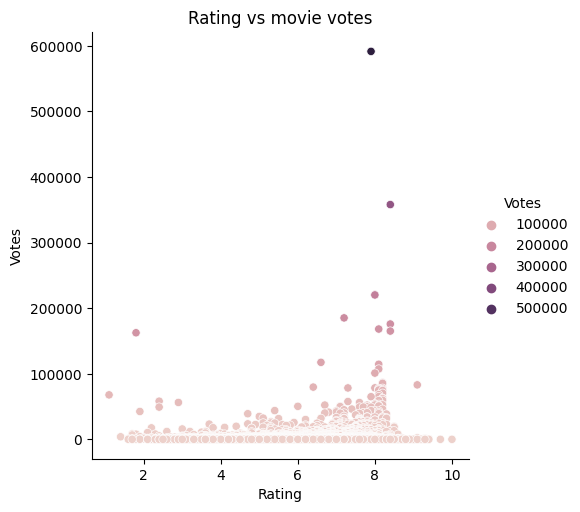

In [38]:
plt.figure(figsize=(8,4))
fig = sns.relplot(clean_data.sort_values(by='Votes',ascending=False), x='Rating',y='Votes',hue='Votes')
fig.set(title='Rating vs movie votes')

In [39]:
# year with the highest rating average
movie_by_year_rating = clean_data[['Year','Rating',]].groupby('Year', as_index=False).mean().sort_values(by='Rating',ascending=False)
movie_by_year_rating.head()

,Year,Rating
21,1952,7.212500
26,1957,7.080645
13,1944,7.075000
9,1940,7.050000
22,1953,6.955000


In [40]:
# Highest rated  movie released each year.
clean_data[['Year','Rating']].groupby('Year',as_index=False).max().sort_values(by='Rating', ascending=False)[:20]

,Year,Rating
89,2020,10.0
90,2021,9.7
88,2019,9.4
87,2018,9.3
76,2007,9.2
84,2015,9.2
80,2011,9.1
86,2017,9.0
77,2008,8.9
85,2016,8.8


In [41]:
yr = clean_data.groupby('Year',as_index=False).count().sort_values(by='Name',ascending=False)
yr[:10]

,Year,Name,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
88,2019,227,227,227,227,227,227,227,227,227
86,2017,211,211,211,211,211,211,211,211,211
87,2018,202,202,202,202,202,202,202,202,202
84,2015,177,177,177,177,177,177,177,177,177
85,2016,173,173,173,173,173,173,173,173,173
82,2013,167,167,167,167,167,167,167,167,167
83,2014,165,165,165,165,165,165,165,165,165
74,2005,141,141,141,141,141,141,141,141,141
89,2020,140,140,140,140,140,140,140,140,140
81,2012,140,140,140,140,140,140,140,140,140


[Text(0.5, 1.0, 'Top 10 years by movie releases')]

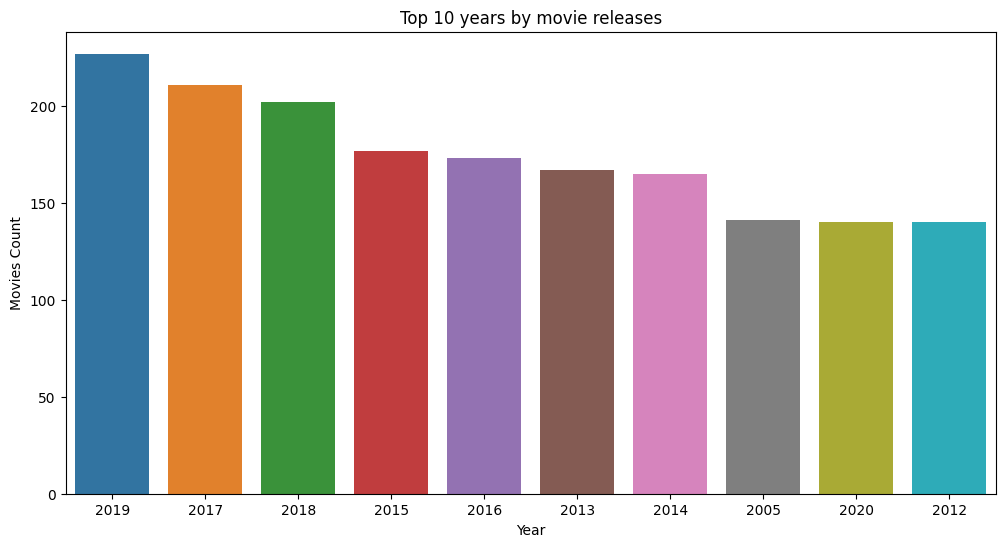

In [42]:
plt.figure(figsize=(12,6))
fig = sns.barplot(yr[:10],x='Year',y='Name')
plt.ylabel('Movies Count')
fig.set(title="Top 10 years by movie releases")


In [43]:
clean_data[clean_data['Year'] == '1931']

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
4171,Draupadi,1931,124,Drama,5.3,6,Bhagwati Prasad Mishra,Khalil,Ermeline,Jillo
14161,The Light of the World,1931,124,"Drama, Fantasy",6.2,112,Ardeshir Irani,Master Vithal,Zubeida,Jillo


[Text(0.5, 1.0, 'Years with highest movie rating')]

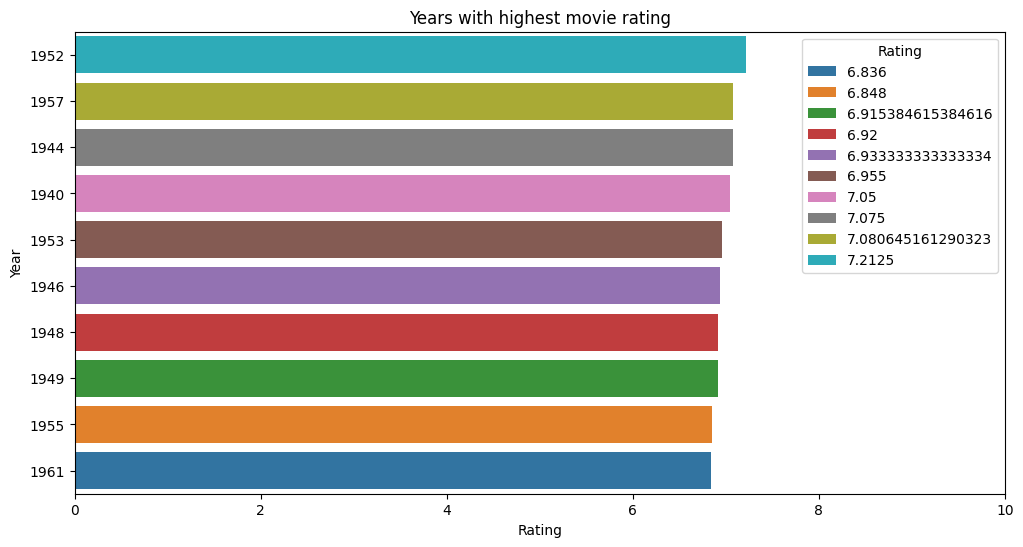

In [44]:
plt.figure(figsize=(12,6))
plt.xlim(0,10)
fig = sns.barplot(movie_by_year_rating[:10], x='Rating', y='Year',hue='Rating',dodge=False )
fig.set(title='Years with highest movie rating')

In [45]:
movie_by_year_rating[movie_by_year_rating['Year'] == '2020']

,Year,Rating
89,2020,6.123571


Text(0.5, 0, 'Movie Count')

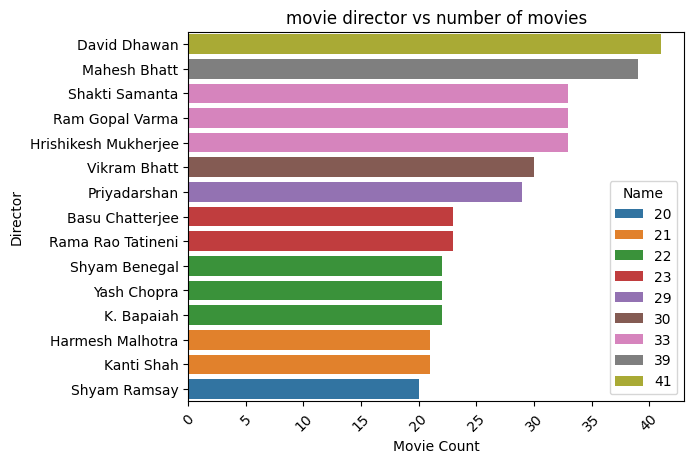

In [46]:
# Which director directed the most movies
plt.xticks(rotation=45)
directors_count = clean_data.groupby(by='Director', as_index=False).count().sort_values(by='Name',ascending=False)
fig = sns.barplot(directors_count[:15], x='Name', y='Director', orient='h', hue='Name',dodge=False)
fig.set(title='movie director vs number of movies')
plt.xlabel('Movie Count')

In [47]:
director_rating = clean_data[['Director','Rating']].groupby(by='Director', as_index=False).mean().sort_values(by='Rating', ascending=False)
print(director_rating.shape)
print(directors_count.shape)

(2431, 2)
(2431, 10)


In [70]:
director_rating.rename({'Director':'Director','Rating':'Average Rating'},inplace=True,axis=1)
directors_count.rename({'Name':'Count'}, inplace=True, axis=1)

In [49]:
director_rating.isna().any()

Director          False
Average Rating    False
dtype: bool

In [71]:
director_rating_movie_count = pd.concat([directors_count,director_rating],axis=1)

In [69]:
director_rating_movie_count.sort_values

<bound method DataFrame.sort_values of                   Director  Name  Year  Duration  Genre  Rating  Votes  \
480           David Dhawan    41    41        41     41      41     41   
1090          Mahesh Bhatt    39    39        39     39      39     39   
1975        Shakti Samanta    33    33        33     33      33     33   
1642       Ram Gopal Varma    33    33        33     33      33     33   
731   Hrishikesh Mukherjee    33    33        33     33      33     33   
...                    ...   ...   ...       ...    ...     ...    ...   
1021     Krishnadev Yagnik     1     1         1      1       1      1   
1019          Krishna Shah     1     1         1      1       1      1   
1018        Krishna Mishra     1     1         1      1       1      1   
1017         Krishna Kumar     1     1         1      1       1      1   
2430          Zunaid Memon     1     1         1      1       1      1   

      Actor 1  Actor 2  Actor 3              Director  Average Rating  


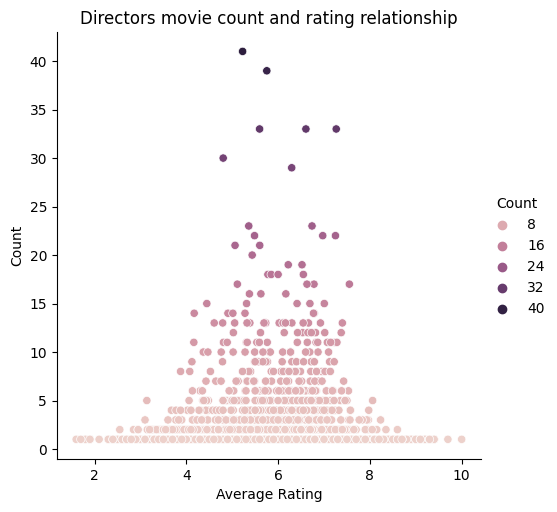

In [99]:
fig = sns.relplot(director_rating_movie_count,x='Average Rating', y='Count', hue='Count')
fig.set(title='Directors movie count and rating relationship')

In [111]:
# Which actor starring in most movie
actor_1_most_movies = clean_data.groupby(by='Actor 1').count().sort_values(by='Duration', ascending=False)[:10]
actor_1_most_movies

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 2,Actor 3
Actor 1,,,,,,,,,
Amitabh Bachchan,104,104,104,104,104,104,104,104,104
Mithun Chakraborty,93,93,93,93,93,93,93,93,93
Ashok Kumar,91,91,91,91,91,91,91,91,91
Dharmendra,90,90,90,90,90,90,90,90,90
Jeetendra,89,89,89,89,89,89,89,89,89
Akshay Kumar,82,82,82,82,82,82,82,82,82
Shashi Kapoor,81,81,81,81,81,81,81,81,81
Rajesh Khanna,74,74,74,74,74,74,74,74,74
Ajay Devgn,70,70,70,70,70,70,70,70,70


Text(0.5, 0, 'Movies Starring')

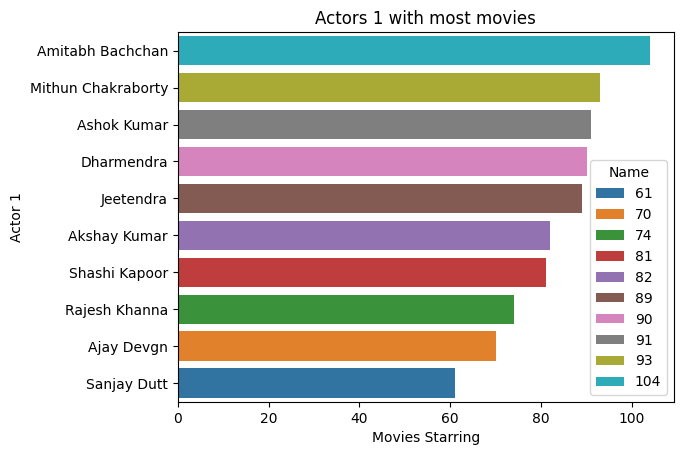

In [104]:
fig = sns.barplot(actor_1_most_movies, x='Name', y=actor_1_most_movies.index,hue='Name', dodge=False)
fig.set(title='Actors 1 with most movies')
plt.xlabel('Movies Starring')

In [94]:
actor_1_rating = clean_data.groupby(by='Actor 1').mean().sort_values(by='Votes', ascending=False)[:20]
actor_1_rating[actor_1_rating['Rating'] > 7.0]
# actors with the most votes and highest rating average


<ipython-input-94-687a47390145>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  actor_1_rating = clean_data.groupby(by='Actor 1').mean().sort_values(by='Votes', ascending=False)[:20]


,Duration,Rating,Votes
Actor 1,,,
Suraj Sharma,127.0,7.9,591417.0
Ben Kingsley,191.0,8.0,220118.0
Amole Gupte,165.0,8.4,175810.0
Dev Patel,120.5,7.8,138287.0
Suriya,153.0,9.1,83029.0
Helen Mirren,122.0,7.3,78340.0
Adarsh Gourav,125.0,7.1,49877.0
Rajat Barmecha,134.0,8.1,43199.0
Priyamvada Narayanan,140.0,7.2,40234.0


In [130]:
print(clean_data.groupby(by='Actor 1').mean().sort_values(by='Votes', ascending=False).shape)
print(clean_data.groupby(by='Actor 1').count().sort_values(by='Duration', ascending=False).shape)
dt1 = clean_data.groupby(by='Actor 1').mean()
dt2 = clean_data.groupby(by='Actor 1').count()
combined_actor1_dt = pd.concat([dt1,dt2['Name']],axis=1)
combined_actor1_dt.rename({'Name':'Movie count'}, inplace=True,axis=1)
combined_actor1_dt.tail()

(1960, 3)
(1960, 9)


<ipython-input-130-561935914459>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(clean_data.groupby(by='Actor 1').mean().sort_values(by='Votes', ascending=False).shape)
<ipython-input-130-561935914459>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dt1 = clean_data.groupby(by='Actor 1').mean()


,Duration,Rating,Votes,Movie count
Actor 1,,,,
Zarina Wahab,135.000000,2.600000,7.00,1
Zayed Khan,133.000000,4.575000,514.75,4
Zeenat Aman,139.363636,6.045455,152.00,11
Zenia Starr,119.000000,7.400000,24.00,1
Zulfi Sayed,164.000000,5.200000,136.50,2


<Figure size 1200x600 with 0 Axes>

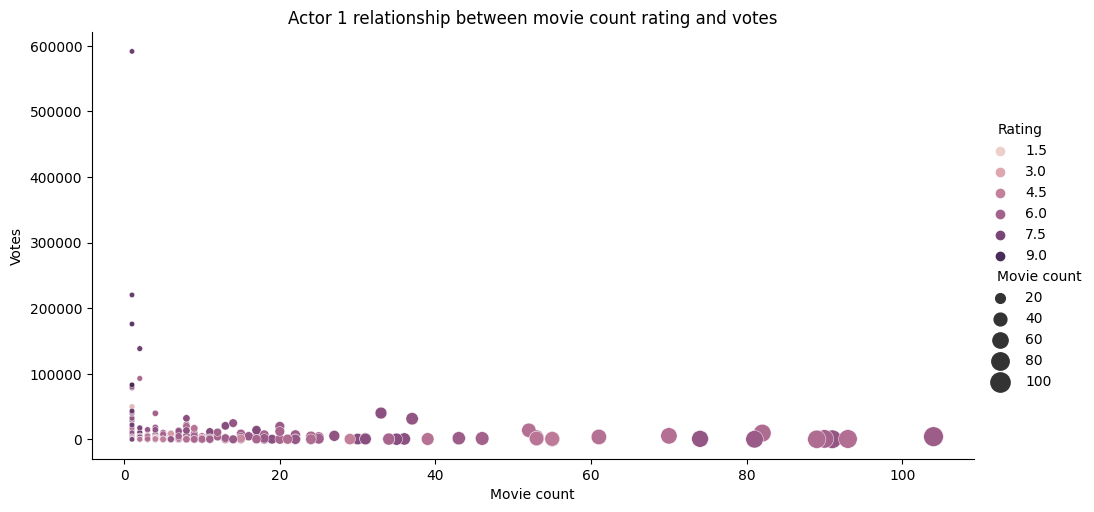

In [140]:
plt.figure(figsize=(12,6))
fig = sns.relplot(combined_actor1_dt, x='Movie count', y='Votes', hue='Rating',size='Movie count',sizes = (15,200),aspect=2)
# fig = sns.relplot(combined_actor1_dt, x='Movie count', y='Votes', kind='line')

fig.set(title='Actor 1 relationship between movie count rating and votes')

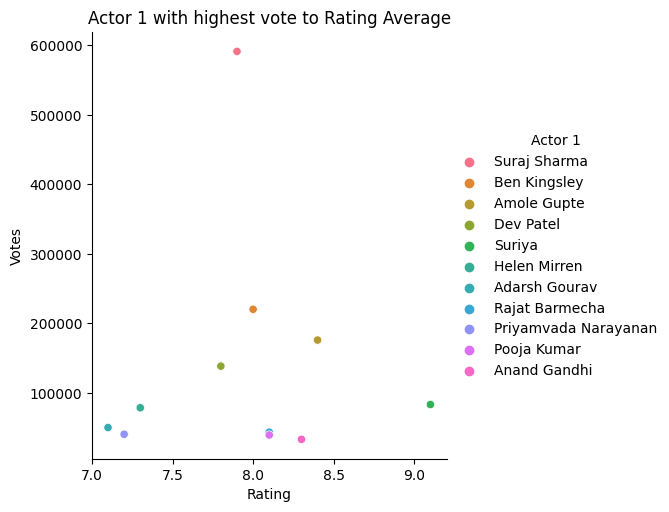

In [97]:
fig = sns.relplot(actor_1_rating[actor_1_rating['Rating'] > 7.0], x='Rating', y='Votes',hue=actor_1_rating[actor_1_rating['Rating'] > 7.0].index)
fig.set(title='Actor 1 with highest vote to Rating Average')

<ipython-input-93-220c34a8628a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  actor_1 = clean_data.groupby(by='Actor 1').sum().sort_values(by='Duration', ascending=False)


[Text(0.5, 1.0, 'Actor 1 with highest Duration in minutees')]

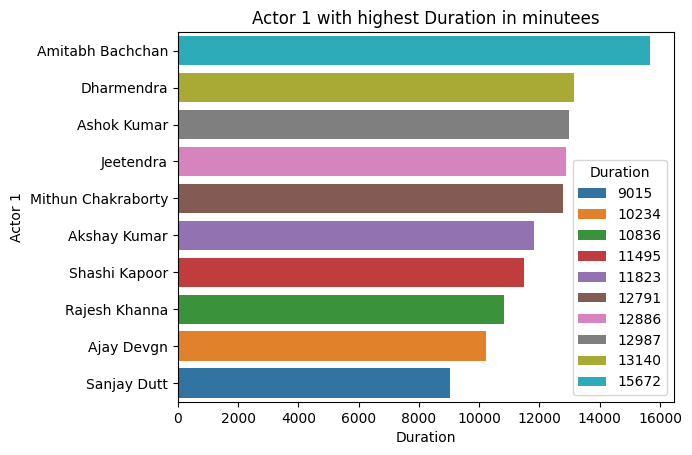

In [93]:
actor_1 = clean_data.groupby(by='Actor 1').sum().sort_values(by='Duration', ascending=False)
fig = sns.barplot(actor_1[:10], x='Duration', y=actor_1[:10].index, hue='Duration', dodge=False )
fig.set(title='Actor 1 with highest Duration in minutes')

# Model Training

In [ ]:
from sklearn.metrics import classification_report, accuracy_score